# __This notebook will be used to investigate and implement different classification models using the iris data set__

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from collections import Counter



### __Loading data set__

In [69]:
IRIS_DATASET = pd.read_csv("iris data set\iris.csv")
iris_df = pd.DataFrame(IRIS_DATASET)
print(iris_df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### __Visualizing data__

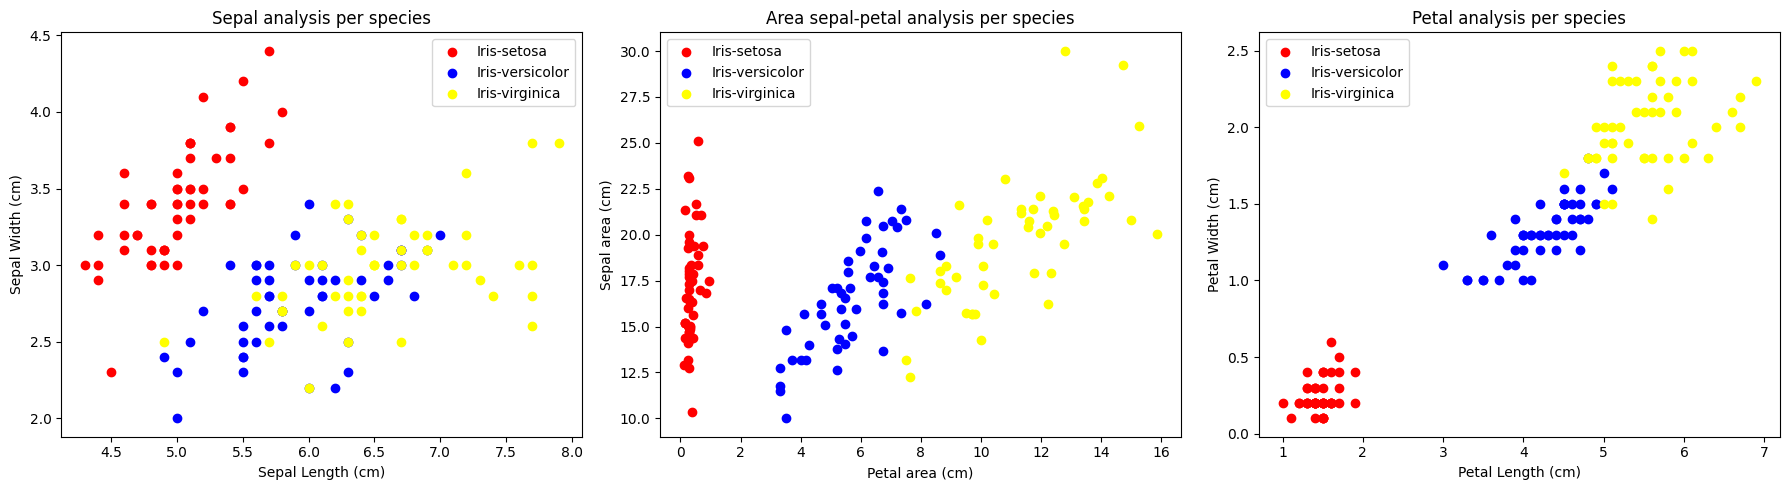

In [70]:
class IrisVisualizer: 
    def __init__(self, df, err=None):
        self.df = df
        self.error = err        # value with mismatching prediction 
        self.colors = {
            "Iris-setosa": "red",
            "Iris-versicolor": "blue",
            "Iris-virginica":"yellow"
        }
        self.species = df["Species"].unique()

    def plot_sepals(self, axes):
        # sepal area between species 
        for idx, row in self.df.iterrows():
            sp = row["Species"]
            color =  self.colors[sp] 
            # compiles till we plot
            axes.scatter(
                row["SepalLengthCm"], 
                row["SepalWidthCm"], 
                color=color,
                label=sp if self.df[self.df["Species"] == sp].index[0] == idx else ""
            )
            if self.error is not None and idx in self.error:
                axes.scatter(
                    row["SepalLengthCm"], 
                    row["SepalWidthCm"], 
                    facecolors='none',
                    edgecolors='black',
                    linewidths=1.5
                )
        axes.set_xlabel("Sepal Length (cm)")
        axes.set_ylabel("Sepal Width (cm)")
        axes.set_title("Sepal analysis per species")
        handles, labels = self.error_marker(axes)
        axes.legend(handles, labels)

    def plot_petals(self, axes):
        # area petal-sepal analysis
        for idx, row in self.df.iterrows():
            sp = row["Species"]
            color =  self.colors[sp] 
            # compiles till we plot
            axes.scatter(
                row["PetalLengthCm"] * row["PetalWidthCm"], 
                row["SepalLengthCm"] * row["SepalWidthCm"],
                color=color,
                label=sp if self.df[self.df["Species"] == sp].index[0] == idx else ""
            )

            if self.error is not None and idx in self.error:
                axes.scatter(
                    row["PetalLengthCm"] * row["PetalWidthCm"], 
                    row["SepalLengthCm"] * row["SepalWidthCm"],
                    facecolors='none',
                    edgecolors='black',
                    linewidths=1.5
                )
        axes.set_xlabel("Petal area (cm)")
        axes.set_ylabel("Sepal area (cm)")
        axes.set_title("Area sepal-petal analysis per species")
        handles, labels = self.error_marker(axes)
        axes.legend(handles, labels)

    def plot_area(self, axes):
        # petal area between species 
        for idx, row in self.df.iterrows():
            sp = row["Species"]
            color =  self.colors[sp] 
            # compiles till we plot
            axes.scatter(
                row["PetalLengthCm"], 
                row["PetalWidthCm"], 
                color=color,
                label=sp if self.df[self.df["Species"] == sp].index[0] == idx else ""
            )
            if self.error is not None and idx in self.error:
                axes.scatter(
                    row["PetalLengthCm"], 
                    row["PetalWidthCm"],
                    facecolors='none',
                    edgecolors='black',
                    linewidths=1.5
                )
        axes.set_xlabel("Petal Length (cm)")
        axes.set_ylabel("Petal Width (cm)")
        axes.set_title("Petal analysis per species")

        handles, labels = self.error_marker(axes)
        axes.legend(handles, labels)


    def error_marker(self, axes):
        handles, labels = axes.get_legend_handles_labels()
        if self.error is not None:
            # add custom legend for errors
            error_marker = mlines.Line2D([], [], color='black', marker='o', 
                                        markersize=8, linestyle='None',
                                        markerfacecolor='none', label='Wrong guess')
            handles.append(error_marker)
            labels.append("Wrong guess")
        return handles, labels

def plot_predictions(df, err):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
    viz = IrisVisualizer(df, err)
    viz.plot_sepals(axes[0])
    viz.plot_petals(axes[1])
    viz.plot_area(axes[2])
    plt.tight_layout()
    plt.show()

# Create a figure with 3 side-by-side axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

viz = IrisVisualizer(iris_df)
viz.plot_sepals(axes[0])
viz.plot_petals(axes[1])
viz.plot_area(axes[2])

plt.tight_layout()
plt.show()

### **Helper function** 

In [71]:
def clean_data():
    # extracting paramters 
    # Drop the label column (Species)
    X = iris_df.drop(columns=["Species", "Id"]).values

    # Grab the label column separately
    y = iris_df["Species"]

    # Process category in numerical format (easy way -> y = iris_df["Species"].astype('category').cat.codes.values)
    label = {
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica":2
    }

    Y = y.map(label).values

    # seperate testing and training data 
    N = len(iris_df)
    indices = np.arange(N)
    np.random.shuffle(indices)
    
    split = int(N * .8)
    
    train_idx = indices[:split]
    test_idx = indices[split:]

    Xtrain = X[train_idx]
    Xtest = X[test_idx]
    Ytrain = Y[train_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx


### **Baseline & Simple Models**
1. Logistic regression
    - Vanilla python

False, Count: 3
True, Count: 27
Training accuracy 0.90
inaccuracy: [[5.9 3.2 4.8 1.8]
 [5.4 3.  4.5 1.5]
 [7.2 3.  5.8 1.6]] -> [ 70  84 129]
predicted: ['Iris-virginica' 'Iris-virginica' 'Iris-versicolor']
true value: ['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica']


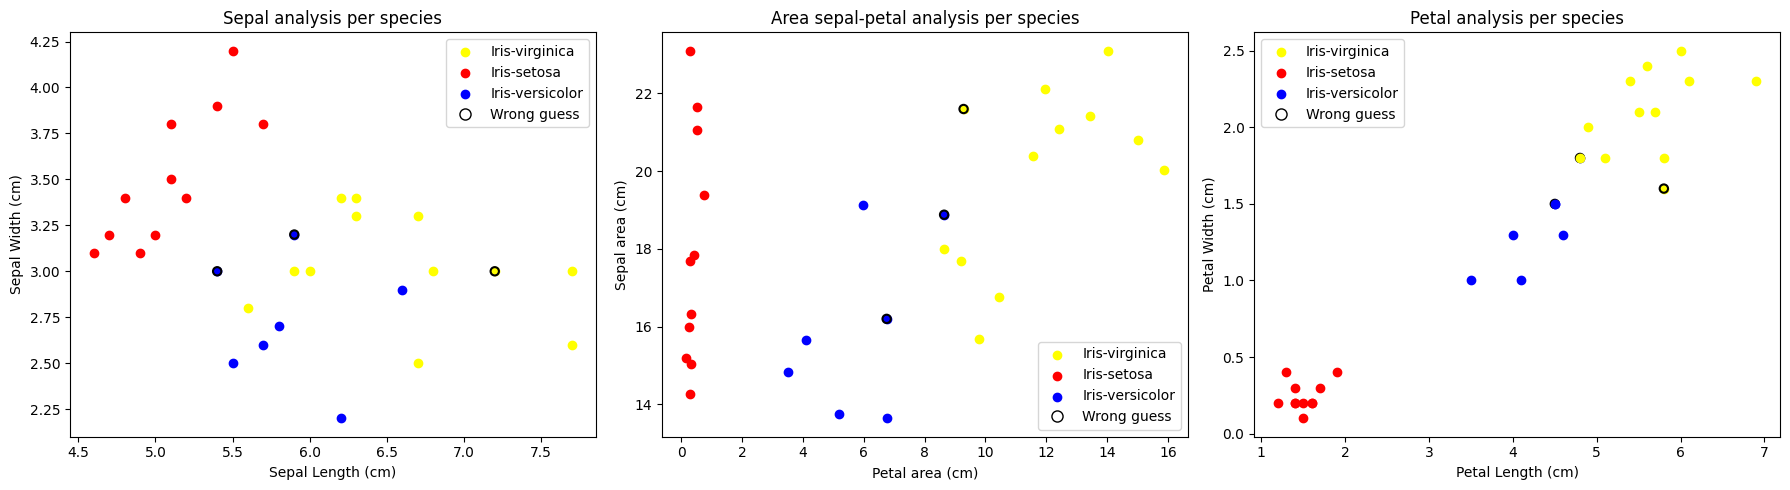

In [72]:
def softmax(logits):
    """
    logits: shape (N, K)
    returns: probabilities, shape (N, K)
    What to do:
    - Apply the softmax equation to each row
    - Use max subtraction for numerical stability
    """
    # case 1: 1 sample -> for prediction 
    if logits.ndim == 1:
        logits = logits - np.max(logits)
        exp_logits = np.exp(logits)
        return exp_logits / np.sum(exp_logits)
    # case 2: batch (n,k) 
    else:
        logits = logits - np.max(logits, axis=1, keepdims=True)
        exp_logits = np.exp(logits)
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


def cross_entropy_loss(probs, y_true):
    """
    probs: predicted probabilities (N, K)
    y_true: correct labels (N,) — each is class index 0..K-1
    returns: scalar loss
    What to do:
    - Pick the predicted prob for the correct class for each sample
    - Take the negative log
    - Average over N
    """
    N = len(probs)

    # grabbing true probability 
    correct_prob = probs[np.arange(N), y_true]

    # calculate the log loss of each probability 
    negative_logs = -np.log(correct_prob)

    # calculate the batch loss
    average_loss = np.mean(negative_logs)

    return average_loss
    


def forward(X, W, b):
    """
    X: input data (N, D)
    W: weights (D, K)
    b: biases (K,)
    returns: logits (N, K)
    What to do:
    - Compute XW + b
    """
    return X @ W + b  


def backward(X, probs, y_true):
    """
    X: (N, D)
    probs: (N, K)
    y_true: (N,)
    returns: gradients dW, db
    What to do:
    - Convert y_true into one-hot
    - Compute derivative of loss w.r.t. logits
    - Get dW and db
    """
    N = np.shape(X)[0]
    K = np.shape(probs)[1]
    encoded_y_true = np.zeros((N, K))
    encoded_y_true[np.arange(N), y_true] = 1

    dJ_dW = (1/N) * np.matmul(np.transpose(X), probs - encoded_y_true )
    dL_db = (1/N) * np.sum(probs - encoded_y_true, axis=0)

    return  dJ_dW, dL_db

def train(X, Y, lr=0.1, epochs=200):
    """
    Train loop:
    - Initialize W, b
    - For each epoch:
        - Forward pass → logits → softmax
        - Compute loss
        - Backward pass → gradients
        - Update W, b with gradient descent
    - Return trained W, b
    """

    # initialize weight and biases
    w = np.zeros((np.shape(X)[1], 3)) # 1x4 feature * 4 (len of x) x 3 (output)
    b = np.zeros(3,) 

    for epoch in range(epochs): 
        logits =  forward(X, w, b)      # returns z
        probability = softmax(logits)   # computes the probability 

        loss = cross_entropy_loss(probability, Y)
        dw , db = backward(X, probability, Y)
        
        w -= dw * lr
        b -= db * lr

        if epoch % 10 == 0:
            pass
            # print(f"i:{epoch} current loss: {loss:.2f}")
    return w, b 

def predict(X,W,b):
    logits = forward(X, W, b)
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

def evaluate(X,Y,W,b, df, test_idx):
    predicted_value = predict(X,W,b)
    matches = predicted_value == Y

    species =np.array(["Iris-setosa",
        "Iris-versicolor",
        "Iris-virginica"])

    unique_elements, counts = np.unique(matches, return_counts=True)

    for element, count in zip(unique_elements, counts):
        print(f"{element}, Count: {count}")
    
    wrong_label = np.where(matches == False)[0]
    df_idx = test_idx[wrong_label]
    print(f"Training accuracy {np.mean(matches):.2f}")
    print(f"inaccuracy: {X[wrong_label]} -> {df_idx}\npredicted: {species[predicted_value[wrong_label]]}\ntrue value: {species[Y[wrong_label]]}")
    df = df.iloc[test_idx]
    plot_predictions(df, df_idx)

    

Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx  = clean_data()

# get weight and bias for prediction 
w, b = train(Xtrain, Ytrain)
evaluate(Xtest, Ytest,w,b, iris_df, test_idx)

### __KNN prediction__
#### Vanilla python 

In [ ]:
class Knn_iris_classification():
    def __init__(self, Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx):
        self.Xtrain = Xtrain
        self.Xtest=Xtest
        self.Ytrain=Ytrain
        self.Ytest=Ytest
        self.train_idx=train_idx
        self.test_idx=test_idx
        self.species_list = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
    
    def euclidean(self, f1, f2):
        delta_f2 = f2[None, : ,: ]
        delta_f1 = f1[:, None ,: ]
        return np.linalg.norm( delta_f2 - delta_f1,  axis=2)
    
    def evaluate(self, prediction):
        same = 0
        diff = 0
        for pred, label in zip(prediction, self.Ytest):
            if pred == label:
                same = same + 1
            else:
                diff = diff + 1

        print(f"total of -> correct prediction: {same}, wrong prediction {diff}")
        print(f"Accuracy: {same / (same + diff)}")
    def classify(self):
        # data sets
        training = self.Xtest       # (n,k)
        neighbor = self.Xtrain      # (p,k)

        dict_idx_label =  {idx: label for idx, label in zip(self.train_idx, self.Ytrain)}

        # computing euclidean distance for every training sets in every neighbor 
        x = self.euclidean(training, neighbor)

        # print(np.shape(training))   #-> (n,k)
        # print(np.shape(neighbor))   #-> (p,k)
        # print(np.shape(x))          #-> (n,p)

        cleaned = []                #-> better name than this 
        # pair the training set with its appropriate idx 
        for training_set in x:
            zipped = list(zip(train_idx, training_set))
            cleaned.append(zipped)

        cleaner = []                #-> better name than this 
        # find the nearest neighboor and return the top 5
        for training_set in cleaned:
            training_set.sort(key=lambda tup: tup[1])
            cleaner.append(training_set[:5])

        print(cleaner)
        decissions = []
        for training_set in cleaner:
            neighbor_idx = [idx for idx, _ in training_set]
            neighbor_label = [dict_idx_label.get(idx) for idx in neighbor_idx]
            specie = Counter(neighbor_label).most_common(1)[0][0]   #returns the value with the highest count data struct -> (value, count)
            
            decissions.append((specie))

        self.evaluate(decissions)  



        # decision = [Ytrain[idx] for _, idx in sliced]      #returns the top 5 closest neighboor 

        # species = Counter(decision).most_common()         calls the list of all unique elements 
        # species = Counter(decision).most_common(1)        returns the first elementinside the list  (not a zero based indexed)
        # species = Counter(decision).most_common(1)[0]     returns the first elemnt in the list 


        # print(f"for sample {train_idx[0]}: {sample}-{self.species_list[0]} prediction ->  {self.species_list[species]} ")

Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx  = clean_data()
knn = Knn_iris_classification(Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx)
knn.classify()


[[(np.int64(1), np.float64(0.1414213562373099)), (np.int64(37), np.float64(0.17320508075688812)), (np.int64(45), np.float64(0.19999999999999998)), (np.int64(30), np.float64(0.244948974278318)), (np.int64(2), np.float64(0.264575131106459))], [(np.int64(67), np.float64(0.24494897427831766)), (np.int64(99), np.float64(0.26457513110645864)), (np.int64(69), np.float64(0.2645751311064592)), (np.int64(94), np.float64(0.3162277660168382)), (np.int64(89), np.float64(0.3316624790355399))], [(np.int64(69), np.float64(0.17320508075688762)), (np.int64(89), np.float64(0.3000000000000001)), (np.int64(53), np.float64(0.3000000000000001)), (np.int64(79), np.float64(0.42426406871192857)), (np.int64(59), np.float64(0.529150262212918))], [(np.int64(11), np.float64(0.2999999999999998)), (np.int64(29), np.float64(0.3741657386773938)), (np.int64(26), np.float64(0.412310562561766)), (np.int64(30), np.float64(0.4242640687119283)), (np.int64(7), np.float64(0.4472135954999579))], [(np.int64(37), np.float64(0.0))